In [10]:
import pandas as pd

datos = pd.read_csv('housing.csv')

In [11]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='longitude', ylabel='latitude'>

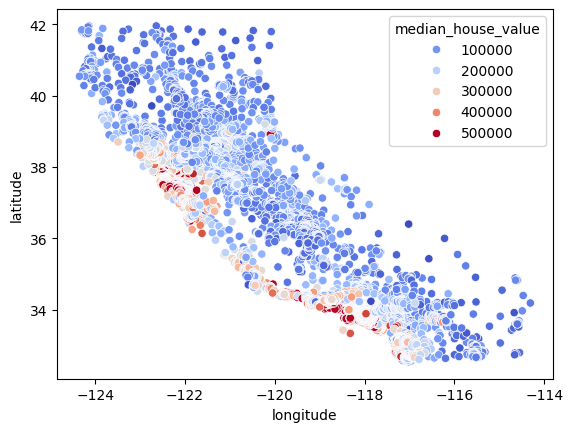

In [22]:
import seaborn as sb
sb.scatterplot(x="longitude", y="latitude", data=datos, hue="median_house_value", palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

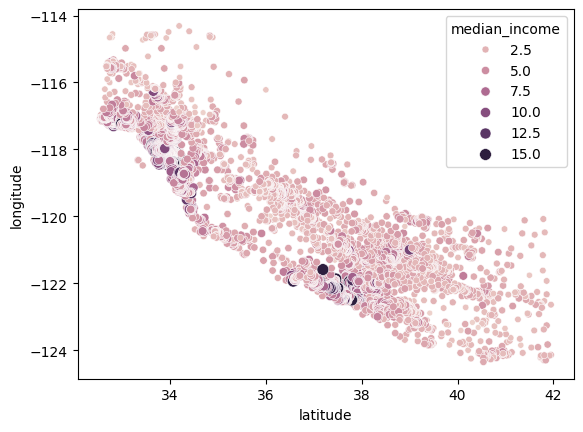

In [28]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_income", size="median_income")

In [13]:
datos.loc[:,["latitude","longitude","median_income"]]	

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [30]:
from sklearn.cluster import KMeans

X = datos.loc[:,["latitude","longitude","median_income"]]
modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(X)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
predicciones.shape

(20640,)

In [32]:
X["segmento_economico"] = predicciones

In [33]:
X

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,5
1,37.86,-122.22,8.3014,5
2,37.85,-122.24,7.2574,5
3,37.85,-122.25,5.6431,5
4,37.85,-122.25,3.8462,4
...,...,...,...,...
20635,39.48,-121.09,1.5603,4
20636,39.49,-121.21,2.5568,4
20637,39.43,-121.22,1.7000,4
20638,39.43,-121.32,1.8672,4


In [34]:
X["segmento_economico"].value_counts()

segmento_economico
0    6838
4    4844
2    4000
5    2800
1    1681
3     477
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

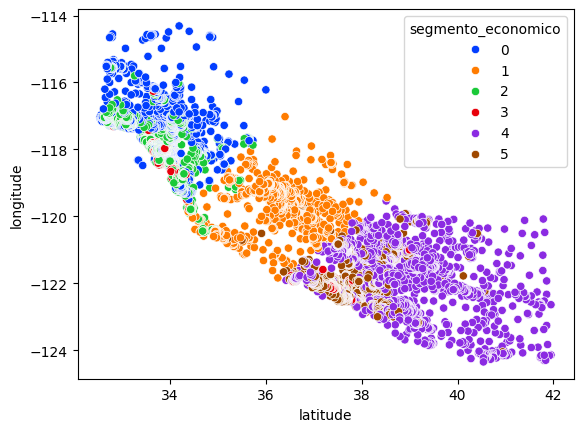

In [36]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=X, hue="segmento_economico", palette="bright")

C:\Users\Ketbome\AppData\Local\Temp\ipykernel_19820\809623068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="segmento_economico", data=X, palette="bright")


<Axes: xlabel='segmento_economico', ylabel='count'>

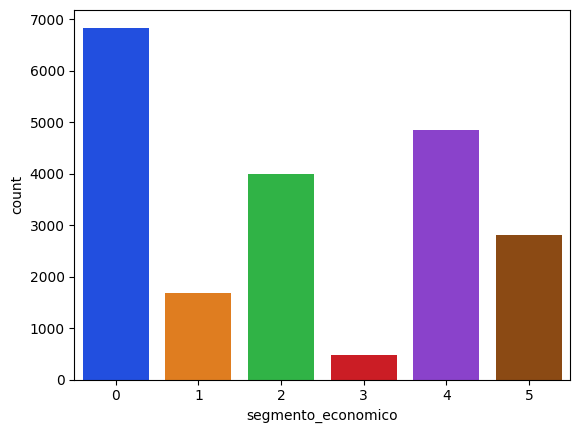

In [37]:
sb.countplot(x="segmento_economico", data=X, palette="bright")

In [38]:
X.groupby(["segmento_economico"])[["median_income"]].mean()

,median_income
segmento_economico,
0,2.840528
1,2.663152
2,5.442504
3,10.848281
4,2.814603
5,5.504208
